# Model

R2 Score: 0.7642868230910039

###Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

###Import Dataset

In [ ]:
from google.colab import files

files.upload()

{}

### Import & Read Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('2018_Financial_Data_Cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Gross Profit Growth,Gross Margin,Intangibles to Total Assets,Net Income,assetTurnover,Revenue,Interest Expense,Debt to Assets,R&D Expenses,SG&A Expense,Revenue Growth
0,0.0009,1.0000,0.0000,-27017000.0,0.005753,1.066000e+06,0.0,0.0000,13432000.0,18707000.0,0.0009
1,0.2403,0.3229,0.4156,31812000.0,0.691675,9.505280e+08,21704000.0,0.3457,0.0,211057000.0,0.2415
2,0.4504,0.3011,0.0873,-321421000.0,0.608241,3.326997e+09,51578000.0,0.2046,0.0,134071000.0,0.4117
3,-0.0119,0.3126,0.0268,175402000.0,1.434673,1.721005e+09,489000.0,0.0000,0.0,168151000.0,0.0788
4,0.1224,0.5554,0.0837,22844000.0,0.428573,3.744010e+08,2916000.0,0.0432,13728000.0,117477000.0,-0.0167


###Check Missing Values

In [ ]:
df.isna().sum()

Gross Profit Growth            0
Gross Margin                   0
Intangibles to Total Assets    0
Net Income                     0
assetTurnover                  0
Revenue                        0
Interest Expense               0
Debt to Assets                 0
R&D Expenses                   0
SG&A Expense                   0
Revenue Growth                 0
dtype: int64

In [ ]:
df.shape

(1575, 11)

###Split Dataset

In [ ]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [ ]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('Revenue Growth')
test_labels = test_features.pop('Revenue Growth')

In [ ]:
train_features.shape

(1260, 10)

###Build and Train Model

In [ ]:
import tensorflow as tf

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)                         
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.optimizers.Adam(),
    metrics = ['mae']
)

history = model.fit(
    train_features, 
    train_labels, 
    validation_split=0.2,
    epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 8ms/step - loss: 0.0795 - mae: 0.0795 - val_loss: 0.0661 - val_mae: 0.0661
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0554 - mae: 0.0554 - val_loss: 0.0649 - val_mae: 0.0649
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0477 - mae: 0.0477 - val_loss: 0.0572 - val_mae: 0.0572
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0438 - mae: 0.0438 - val_loss: 0.0559 - val_mae: 0.0559
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0460 - mae: 0.0460 - val_loss: 0.0539 - val_mae: 0.0539
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0402 - mae: 0.0402 - val_loss: 0.0511 - val_mae: 0.0511
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0391 - mae: 0.0391 - val_loss: 0.0594 - val_mae: 0.0594
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0392 - mae: 0.03

###Test Model

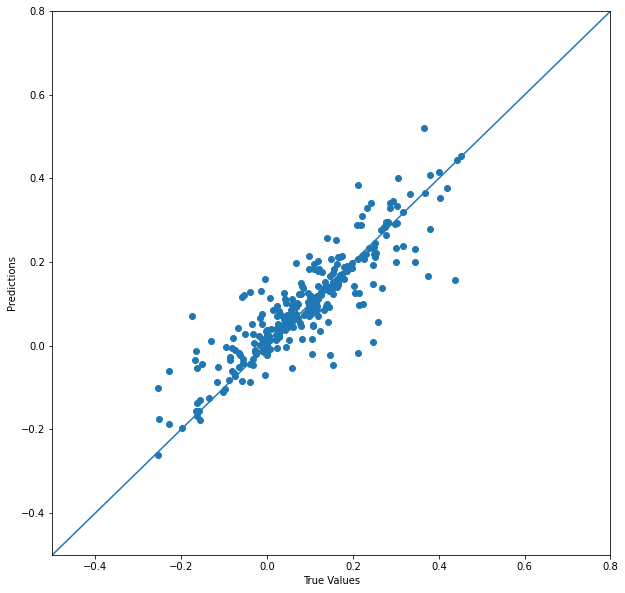

In [ ]:
import matplotlib.pyplot as plt

test_pred = model.predict(test_features).flatten()

plt.figure(figsize=(10, 10))

plt.scatter(test_labels, test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

lims = [-0.5, 0.8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
model.predict(test_features.iloc[1].values).flatten()

array([0.04942248], dtype=float32)

###Model Evaluation with R2 Score

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_labels, test_pred)

0.7642868230910039

###Save Final Model in SavedModel format

In [ ]:
!mkdir -p saved_model
tf.saved_model.save(model, 'saved_model/revenue_growth_regression_model')

INFO:tensorflow:Assets written to: saved_model/revenue_growth_regression_model/assets


###Save Final Model in H5 format

In [ ]:
!mkdir -p h5_model
model.save('h5_model/revenue_growth_regression_model.h5')

###Convert and Save Final Model into TFLite format

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model=model)
tfmodel = converter.convert()
open("revenue_growth.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpwvil1h99/assets


171936

In [ ]:
ls

2018_Financial_Data_Cleaned.csv  h5_model/              saved_model/
2018_Financial_Data_MinMax.csv   revenue_growth.tflite
2018_Financial_Data_ZScore.csv   sample_data/


In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/revenue_growth_regression_model/ (stored 0%)
  adding: content/saved_model/revenue_growth_regression_model/saved_model.pb (deflated 88%)
  adding: content/saved_model/revenue_growth_regression_model/assets/ (stored 0%)
  adding: content/saved_model/revenue_growth_regression_model/variables/ (stored 0%)
  adding: content/saved_model/revenue_growth_regression_model/variables/variables.index (deflated 64%)
  adding: content/saved_model/revenue_growth_regression_model/variables/variables.data-00000-of-00001 (deflated 7%)
